# Laboratory 01

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium import plugins
import math
%matplotlib inline
sns.set()
file_name='data/gun_violence_data_2013_2018.xlsx'
sheet_name='Arkusz2'
df = pd.read_excel(file_name, sheet_name)
sheet_name='Arkusz1'
df_state_population = pd.read_excel(file_name, sheet_name)

In [2]:
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,latitude,longitude
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,40.3467,-79.8559
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,33.9090,-118.3330
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,41.4455,-82.1377
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,39.6518,-104.8020
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,36.1140,-79.9569


## 1)  What is the state with the most murders?

In [3]:
df_state_count = df[['state','n_killed',]]
df_state_count = df_state_count.groupby(['state'], as_index = False).sum()

In [4]:
df_state_population = pd.merge(left=df_state_count, right=df_state_population, left_on='state', right_on='State')
del df_state_population['State']

### States with most murders

In [5]:
df_state_population=df_state_population.sort_values(by=['n_killed'],ascending=False)
df_state_population.head()

,state,n_killed,2013_population
4,California,5562,38332521
43,Texas,5046,26448193
9,Florida,3909,19552860
13,Illinois,3409,12882135
35,Ohio,2508,11570808


In [6]:
df_state_population['hundredK_rate'] = 100_000 * df_state_population['n_killed'] / df_state_population['2013_population']
df_state_population=df_state_population.sort_values(by=['hundredK_rate'], ascending=False, ignore_index=True)

df_state_population.head()

,state,n_killed,2013_population,hundredK_rate
0,District of Columbia,459,646449,71.003281
1,Louisiana,2179,4625470,47.108726
2,Mississippi,1176,2991207,39.315233
3,Alabama,1880,4833722,38.893424
4,Alaska,267,735132,36.320008


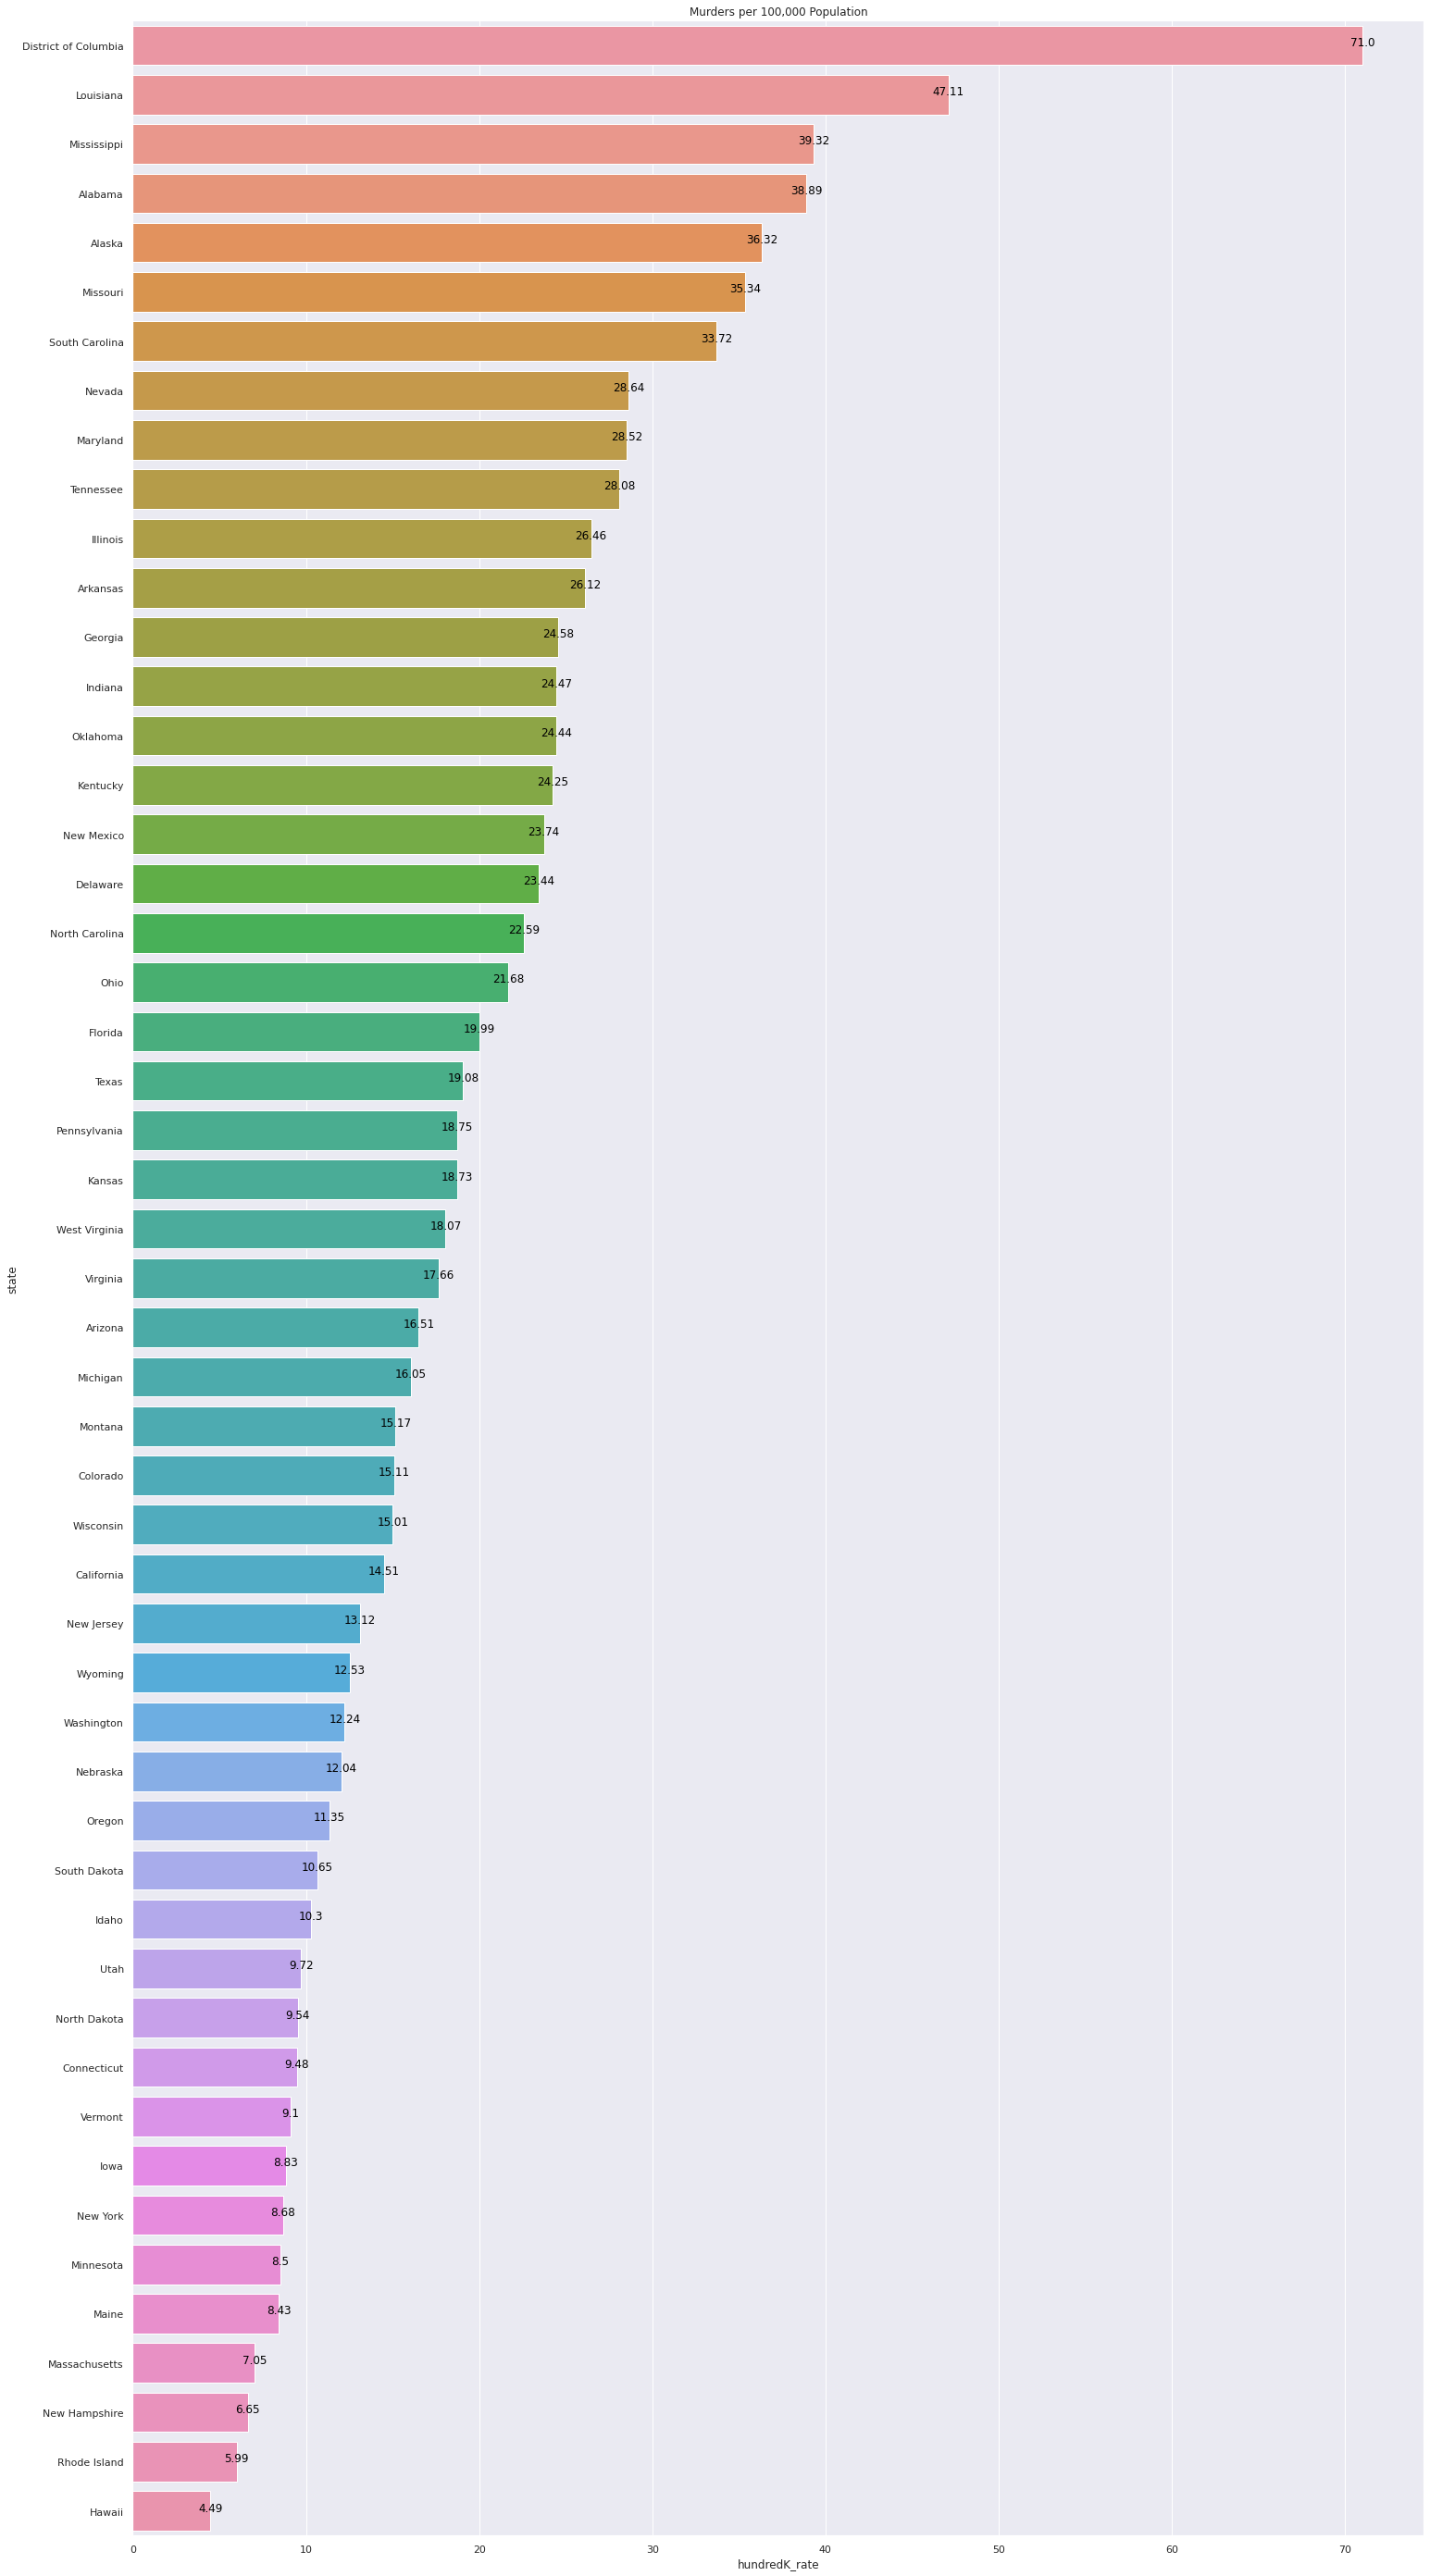

In [7]:
ax=sns.barplot(data=df_state_population, x='hundredK_rate', y='state')
fig = plt.gcf()
fig.set_size_inches(25, 50)
for index, row in df_state_population.iterrows():

    ax.text(x=row.hundredK_rate,y=row.name, s=round(row.hundredK_rate,2), color='black', ha="center")
ax.set_title('Murders per 100,000 Population')
plt.show()

## Answer:
The states with most murders are Texas and California (see table above). But that doesn't mean that they're the most dangerous states, as we can see in the bar graph, the state with most murders per 100,000 habitants is the __District of Columbia__, with 71. __California__ has 5562 murders compared to the 459 of Columbia, but has a much lower rate of 14.51; while __Texas__ has 5046 murders and 19.08 of ratio per 100k habitants.

In conclusion, the District of Columbia can be considered to be _more_ dangerous, despite other states having more murders.

## 2) Create new csv dataset

In [8]:
#Creating new csv
df_new_csv = pd.DataFrame()
df_new_csv['state'] = df_state_population['state']
df_new_csv['population'] = df_state_population['2013_population']
df_new_csv['murders_total'] = df_state_population['n_killed']
df_new_csv['murder_rate'] = df_state_population['hundredK_rate']
df_new_csv.to_csv('data/new_dataset.csv')

## 3) Describe the distribution of murder rates across states

In [18]:
print('mean: %s' % df_new_csv['murder_rate'].mean())
print('std: %s' % df_new_csv['murder_rate'].std())
print('max: %s' % df_new_csv['murder_rate'].max())
print('min: %s' % df_new_csv['murder_rate'].min())

mean: 19.843827358791238
std: 12.27463412675938
max: 71.00328100128549
min: 4.487006909990641


As we can see above, the rates of states vary between 71 and 4.48 murders, with a mean of 19.84 and a std of 12.27.
Most of our values are contained between 2 stds, except for 2 cases.
The District of Columbia is most certainly an outlier that goes above 3 stds from the mean, meaning that is by far the first place you should avoid if you're concerned with security.
The average of the USA is still pretty high if we compare it to other countries, even the minimum value (Hawaii) is higher that any other country displayed on the first plot.
Personally I wouldn't be scared by this numbers, as long as you take precautions and try to stay safe in your stay in the USA.

In [ ]:
'''
usaMap = folium.Map(location=[34.0522,-118.2437], tiles='Muders USA', zoom_start=9)

for i,row in df.iterrows():
    
    if not math.isnan(row.latitude):
        folium.CircleMarker((row.latitude,row.longitude), radius=3, weight=row.n_killed, color='red', fill_color='red', fill_opacity=.5).add_to(usaMap)
#usaMap.add_children(plugins.HeatMap(data=df[['latitude', 'longitude']].as_matrix(), radius=25, blur=10))
usaMap.save('usaHeatmap.html')
'''

### Sources:
population data:
https://www.governing.com/gov-data/census/census-state-population-estimates-births-deaths-migration-totals-2013.html